In [2]:
import pandas as pd

# 读取CSV文件
file_path = 'sleep_cycle_productivity.csv'  # 替换为实际的文件路径
data = pd.read_csv(file_path)
data


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


In [11]:
# 选择数值型列，排除 'Date', 'Person_ID', 'Gender'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 计算每个数值列的最大值和最小值
max_value = [0]*13
min_value = [0]*13

print(numeric_columns)
print(type(numeric_columns))

max_values = data[numeric_columns].max()
min_values = data[numeric_columns].min()



Index(['Person_ID', 'Age', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score',
       'Stress Level', 'Sleep Duration'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [17]:
# 确保 'Sleep Start Time' 和 'Sleep End Time' 是浮点数
data['Sleep Start Time'] = data['Sleep Start Time'].astype(float)
data['Sleep End Time'] = data['Sleep End Time'].astype(float)

data["Sleep Duration"] = [0]*len(data)

for i in range(0,len(data)):
    data['Sleep Duration'][i] = 60* (data['Sleep End Time'][i] - data['Sleep Start Time'][i])
    if data['Sleep Duration'][i] < 0:
        data['Sleep Duration'][i] = 60* (data['Sleep End Time'][i] - data['Sleep Start Time'][i]+24)



# 显示前几行数据，检查计算结果
print(data[['Sleep Start Time', 'Sleep End Time', 'Sleep Duration']].head())


   Sleep Start Time  Sleep End Time  Sleep Duration
0             23.33            4.61           316.8
1             21.02            2.43           324.6
2             22.10            3.45           321.0
3             23.10            6.65           453.0
4             21.42            4.17           405.0


C:\Users\Zibo\AppData\Local\Temp\ipykernel_31648\4112588201.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Sleep Duration'][i] = 60* (data['Sleep End Time'][i] - data['Sleep Start Time'][i])
C:\Users\Zibo\AppData\Local\Temp\ipyker

In [18]:
# 确保 'Sleep Start Time' 和 'Sleep End Time' 是浮点数
data['Sleep Start Time'] = data['Sleep Start Time'].astype(float)
data['Sleep End Time'] = data['Sleep End Time'].astype(float)

# 找到最早的入睡时间（最小值）
earliest_start_time = data['Sleep Start Time'].min()

# 转换所有的入睡时间和醒来时间为相对分钟数
data['Sleep Start Time'] = (data['Sleep Start Time'] - earliest_start_time) * 60
data['Sleep End Time'] = (data['Sleep End Time'] - earliest_start_time) * 60

# 计算睡眠时长（单位：分钟）
data['Sleep Duration'] = data.apply(
    lambda row: (row['Sleep End Time'] - row['Sleep Start Time']) if row['Sleep End Time'] > row['Sleep Start Time']
    else (row['Sleep End Time'] + 24*60 - row['Sleep Start Time']),
    axis=1
)

# 显示前几行数据，检查结果
print(f"最早的入睡时间: {earliest_start_time} (作为基准0)")
print(data[['Sleep Start Time', 'Sleep End Time', 'Sleep Duration']].head())


最早的入睡时间: 20.0 (作为基准0)
   Sleep Start Time  Sleep End Time  Sleep Duration
0             199.8          -923.4           316.8
1              61.2         -1054.2           324.6
2             126.0          -993.0           321.0
3             186.0          -801.0           453.0
4              85.2          -949.8           405.0


In [19]:
import matplotlib.pyplot as plt

# 按照'Person_ID'从小到大排序，并选择前30个数据
data_sorted = data.sort_values(by='Person_ID').head(30)
data_sorted

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Sleep Duration
2250,2024-04-10,1000,48,Other,106.2,-1050.6,4.72,10,87,122,7,10.351605,3,10,4,283.2
2840,2024-03-26,1000,30,Male,118.8,-959.4,6.03,4,61,12,164,7.536309,2,2,5,361.8
2505,2024-12-14,1001,28,Other,48.0,-879.6,8.54,10,55,113,73,8.600206,6,6,3,512.4
2587,2024-09-04,1003,18,Female,90.0,-939.6,6.84,5,18,196,117,4.986434,7,3,7,410.4
3202,2024-04-20,1003,38,Female,145.2,-891.6,6.72,8,7,72,77,5.026656,4,3,7,403.2
207,2024-06-04,1006,21,Male,180.0,-886.2,6.23,4,18,156,145,9.095219,1,1,6,373.8
4815,2024-12-06,1007,28,Male,57.0,-919.2,7.73,7,15,100,173,9.451075,2,10,2,463.8
3654,2024-03-26,1008,25,Female,198.0,-775.8,7.77,9,55,30,169,5.358833,8,1,7,466.2
62,2024-06-26,1009,22,Other,103.2,-1006.2,5.51,8,1,83,64,5.110598,9,1,9,330.6
2128,2024-07-21,1010,43,Other,16.2,-1102.2,5.37,10,33,89,8,6.165184,7,6,2,321.6


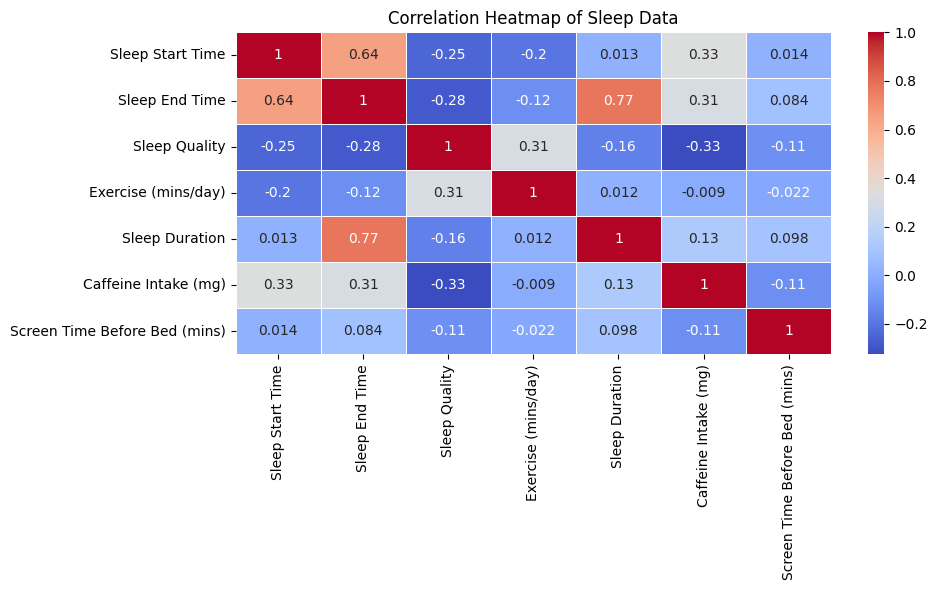

In [20]:
import seaborn as sns  # 导入 Seaborn 库
# 计算相关性矩阵
correlation_matrix = data_sorted[['Sleep Start Time', 'Sleep End Time', 'Sleep Quality', 'Exercise (mins/day)',
                                  'Sleep Duration','Caffeine Intake (mg)','Screen Time Before Bed (mins)']].corr()

# 创建热图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 设置标题
plt.title('Correlation Heatmap of Sleep Data')

# 显示图形
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

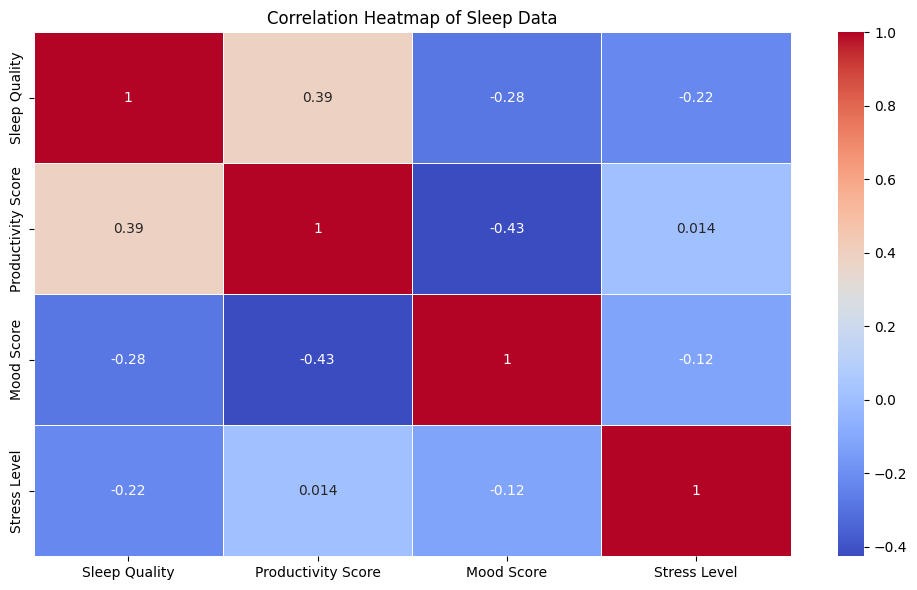

In [21]:
# 计算相关性矩阵
correlation_matrix = data_sorted[['Sleep Quality', 'Productivity Score','Mood Score','Stress Level']].corr()

# 创建热图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 设置标题
plt.title('Correlation Heatmap of Sleep Data')

# 显示图形
plt.tight_layout()
plt.savefig('heatmap1.png')
plt.show()

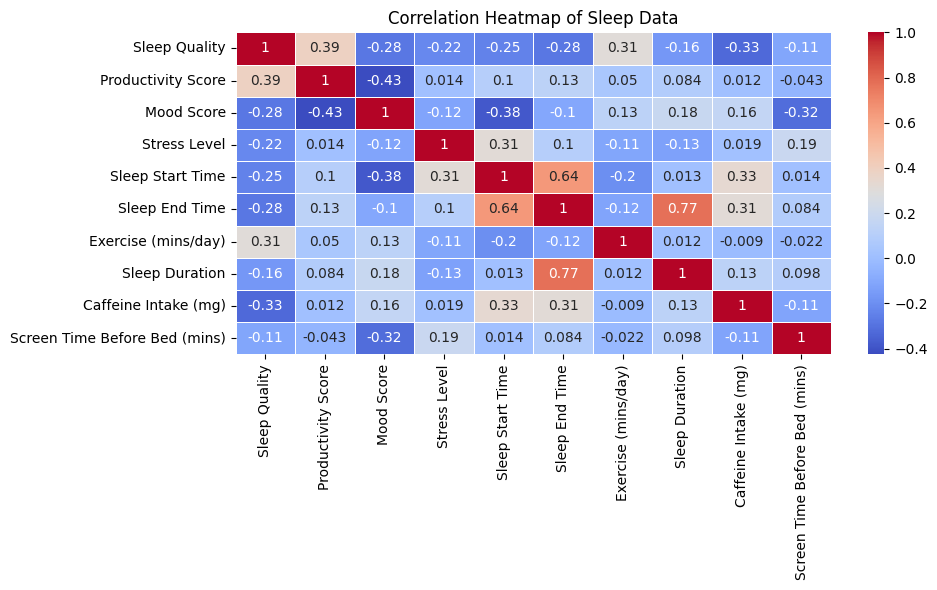

In [22]:
# 计算相关性矩阵
correlation_matrix = data_sorted[['Sleep Quality', 'Productivity Score','Mood Score','Stress Level','Sleep Start Time', 'Sleep End Time', 'Exercise (mins/day)',
                                  'Sleep Duration','Caffeine Intake (mg)','Screen Time Before Bed (mins)']].corr()

# 创建热图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 设置标题
plt.title('Correlation Heatmap of Sleep Data')

# 显示图形
plt.tight_layout()
plt.savefig('heatmap2.png')
plt.show()

In [23]:
import plotly.graph_objects as go
import numpy as np
file_path = 'sleep_cycle_productivity.csv'
data = pd.read_csv(file_path)
# 假设 'data' 是包含 'Sleep Quality' 列的 DataFrame
sleep_quality_counts = data['Sleep Quality'].value_counts().sort_index()

lenth = len(data)
arr_quality = [0] * 10
for i in range(0, lenth):
    if data['Sleep Quality'].iloc[i] == 1:
        arr_quality[0] += 1
    if data['Sleep Quality'].iloc[i] == 2:
        arr_quality[1] += 1
    if data['Sleep Quality'].iloc[i] == 3:
        arr_quality[2] += 1
    if data['Sleep Quality'].iloc[i] == 4:
        arr_quality[3] += 1
    if data['Sleep Quality'].iloc[i] == 5:
        arr_quality[4] += 1
    if data['Sleep Quality'].iloc[i] == 6:
        arr_quality[5] += 1
    if data['Sleep Quality'].iloc[i] == 7:
        arr_quality[6] += 1
    if data['Sleep Quality'].iloc[i] == 8:
        arr_quality[7] += 1
    if data['Sleep Quality'].iloc[i] == 9:
        arr_quality[8] += 1
    if data['Sleep Quality'].iloc[i] == 10:
        arr_quality[9] += 1

sleep_quality_percent = [0] * 10
for i in range(0, 10):
    sleep_quality_percent[i] = arr_quality[i] / lenth

sleep_quality_percent = pd.Series(sleep_quality_percent, index=range(1, 11))

# 生成十种不同的颜色
colors = [f'rgb({int(r * 255)}, {int(g * 255)}, {int(b * 255)})' for r, g, b, _ in
          plt.cm.viridis(np.linspace(0, 1, 10))]

# 计算各部分的角度
theta1 = np.radians(140)
widths = sleep_quality_percent.values * 2 * np.pi

# 增加的高度倍数，可根据需要调整
height_multiplier = 1.0

fig = go.Figure()

print(arr_quality)

num = 0
for i in range (0,len(arr_quality)):
    num = num + arr_quality[i] * (i+1)
num_mean = num / 5000

var = 0

for i in range(0,len(arr_quality)):
    dis = arr_quality[i] - num_mean
    if dis < 0:
        dis = 0 - dis
    var = var + dis
var = var/5000
var


[480, 503, 490, 508, 521, 489, 517, 491, 480, 521]


0.9889583999999997

In [24]:
for i, (width, color) in enumerate(zip(widths, colors)):
    # 生成扇形的角度范围
    theta = np.linspace(theta1, theta1 + width, 100)
    r = np.linspace(0, 1, 100)
    R, Theta = np.meshgrid(r, theta)
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    height = i * 0.1 * height_multiplier

    # 绘制扇形的顶部
    Z_top = np.ones_like(X) * height
    fig.add_trace(go.Surface(
        x=X,
        y=Y,
        z=Z_top,
        surfacecolor=np.ones_like(X) * i,  # 这里使用 i 让每个部分颜色不同
        colorscale=[[0, color], [1, color]],  # 让颜色固定为当前扇形的颜色
        showscale=False,
        opacity=1
    ))

    # 绘制扇形的弧面侧面
    for j in range(len(theta) - 1):
        x_side = [np.cos(theta[j]), np.cos(theta[j + 1]), np.cos(theta[j + 1]), np.cos(theta[j])]
        y_side = [np.sin(theta[j]), np.sin(theta[j + 1]), np.sin(theta[j + 1]), np.sin(theta[j])]
        z_side = [0, 0, height, height]
        i_side = [0, 1, 2, 0, 2, 3]
        fig.add_trace(go.Mesh3d(
            x=x_side,
            y=y_side,
            z=z_side,
            i=i_side,
            j=np.roll(i_side, -1),
            k=np.roll(i_side, -2),
            color=color,
            opacity=1
        ))

    # 绘制扇形的两条直边侧面
    # 第一条直边
    x_edge1 = [0, np.cos(theta[0]), np.cos(theta[0]), 0]
    y_edge1 = [0, np.sin(theta[0]), np.sin(theta[0]), 0]
    z_edge1 = [0, 0, height, height]
    i_edge1 = [0, 1, 2, 0, 2, 3]
    fig.add_trace(go.Mesh3d(
        x=x_edge1,
        y=y_edge1,
        z=z_edge1,
        i=i_edge1,
        j=np.roll(i_edge1, -1),
        k=np.roll(i_edge1, -2),
        color=color,
        opacity=1
    ))
    # 第二条直边
    x_edge2 = [0, np.cos(theta[-1]), np.cos(theta[-1]), 0]
    y_edge2 = [0, np.sin(theta[-1]), np.sin(theta[-1]), 0]
    z_edge2 = [0, 0, height, height]
    i_edge2 = [0, 1, 2, 0, 2, 3]
    fig.add_trace(go.Mesh3d(
        x=x_edge2,
        y=y_edge2,
        z=z_edge2,
        i=i_edge2,
        j=np.roll(i_edge2, -1),
        k=np.roll(i_edge2, -2),
        color=color,
        opacity=1
    ))

    # 绘制扇形底部（xy 平面上的部分）
    Z_bottom = np.zeros_like(X)
    fig.add_trace(go.Surface(
        x=X,
        y=Y,
        z=Z_bottom,
        surfacecolor=[[color] * X.shape[1]] * X.shape[0],
        showscale=False,
        opacity=1
    ))

    # 显示标签
    mid_angle = theta1 + width / 2
    label_x = 1.2 * np.cos(mid_angle)
    label_y = 1.2 * np.sin(mid_angle)
    label_z = height
    percentage_text = f"{sleep_quality_percent.iloc[i] * 100:.1f}%"
    fig.add_trace(go.Scatter3d(
        x=[label_x],
        y=[label_y],
        z=[label_z],
        mode='text',
        text=[f"{sleep_quality_percent.index[i]} ({percentage_text})"],
        textposition='middle center',
        showlegend=False
    ))

    theta1 += width

# 设置 3D 视角
max_height = len(sleep_quality_counts) * 0.1 * height_multiplier
fig.update_layout(
    scene=dict(zaxis=dict(range=[0, max_height])),
    title='3D Pie Chart of Sleep Quality',
    showlegend=False,
    scene_xaxis_visible=False,
    scene_yaxis_visible=False,
    scene_zaxis_visible=False
)

# 保存为 HTML 文件
fig.write_html('3d_pie_chart.html')